# CSV to NPY

> In this file, Cr is radians.

### CSV to NPY

1-3. **TCP(x,y,z)**
4-6. **eef(x,y,z)** 
7. **angle** = Cr (idx: 6)
7. **angle** = Pitch (idx: 7)
7. **angle** = Roll (idx: 8)
10. **manipulability** (idx: 9)
11. Joint 1
12. Joint 2
13. Joint 3
14. Joint 4 
15. Joint 5
16. Joint 6



In [3]:
import csv
import numpy as np

raw = []
with open('indyrobot_manip_z0,1d0,25.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        TCPx = round(float(row[0]),2)
        TCPy = round(float(row[1]),2)
        TCPz = round(float(row[2]),2)
        eefx = float(row[3])
        eefy = float(row[4])
        eefz = float(row[5])
        Cr = float(row[6])  # radian
        Pitch = float(row[7])  # radian
        Roll = float(row[8])  # radian
        M = round(float(row[9]),3)
        J1 = float(row[10])
        J2 = float(row[11])
        J3 = float(row[12])
        J4 = float(row[13])
        J5 = float(row[14])
        J6 = float(row[15])
        raw.append([TCPx, TCPy, TCPz, eefx, eefy, eefz, Cr, Pitch, Roll, M, J1, J2, J3, J4, J5, J6])
npraw = np.array(raw)

np.save('indyrobot_manip_z0,1d0,25', npraw)
print(npraw.shape)

(7654, 16)


### Load NPY

In [4]:
Indy = np.load('indyrobot_manip_z0,1d0,25.npy')
print(Indy.shape)

(7654, 16)


In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def scatter_2d(ax, theta, xs, ys, manip, dot_size=1, arrow_size=2):
    colors = np.array([(1.0-m, m, 0.0, m) for m in manip])
    ax.scatter(xs, ys, c=colors, s=dot_size)
    ax.set_xlabel('x(cm)', fontsize=15)
    ax.set_ylabel('y(cm)', fontsize=15)
    ax.set_title('Manipulability Layer: $C_{r}$=%.1fdeg'% theta)
    ax.grid(True)
    # robot and object
    arrow_x = np.array([1.0, -0.5, -0.5, 1.0]) * arrow_size
    arrow_y = np.array([0.0, 0.5, -0.5, 0.0]) * arrow_size
    ax.plot(arrow_x, arrow_y)
    
def scatter_3d(ax, theta, xs, ys, manip):
    colors = np.array([(1.0-m, m, 0.0, m) for m in manip])
    ax.scatter(xs, ys, zs=theta, c=colors)
    ax.set_xlabel('x(cm)', fontsize=15)
    ax.set_ylabel('y(cm)', fontsize=15)
    ax.set_zlabel('$\Theta$(deg)', fontsize=15)
    ax.set_title('Manipulability Map')


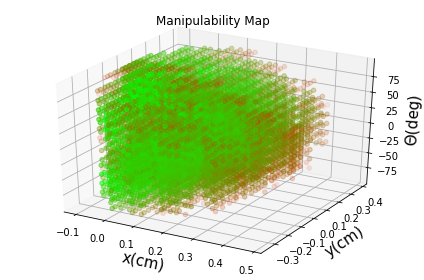

In [7]:
Fig3D = plt.figure()
ax = Fig3D.add_subplot(111, projection='3d')

scatter_3d(ax, Indy[:, 6], Indy[:, 0], Indy[:, 1], Indy[:, 9]*7)
Fig3D.tight_layout()
plt.show()

In [8]:
print(Indy[:, 9])

[0.094 0.114 0.118 ... 0.034 0.007 0.007]
